# Import Datasets #

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataSet = pd.read_excel('Data/Data analyst Data.xlsx')
dataSet

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Patel Niraj,patelniraj@xyz.com,1,The SDLC & their transformations,Attending,"thakur institute of management studies, career...",LinkedIn | Whatsapp | Email,NaN,Students,2024,Jodhpur,6.9,6,0-2 Lakh,15,yes
4890,VIDIT,vidit@xyz.com,1,Data Visualization using Power BI,Attending,government polytechnic gandhinagar,NaN,NaN,Students,2023,Jalgaon,6.5,6,0-2 Lakh,8,no
4891,Suryaprakash,suryaprakash@xyz.com,1,Data Visualization using Power BI,Attending,"vishwakarma institute of technology, pune",NaN,NaN,Students,2024,Thane,6.9,5,0-2 Lakh,7,no
4892,Saif ali,saifali@xyz.com,1,Data Visualization using Power BI,Attending,"mit academy of engineering ,alandi",NaN,NaN,Students,2024,Patiala,9.0,3,0-2 Lakh,23,yes


# How many students from various cities? (Solve using data visualisation tool). #

In [3]:
city_counts = dataSet['City'].value_counts().reset_index(name='Student Count')
result = city_counts.sort_values(by='City', ascending=True).reset_index(drop=True)
result.to_csv('Data/Moderate Questions/Total Students Based on City.csv', index=False)
result

,City,Student Count
0,Agartala,28
1,Agra,28
2,Ahemdabad,52
3,Ajmer,51
4,Akola,42
...,...,...
172,Vidisha,42
173,Vijaywada,22
174,Wardha,14
175,konark,14


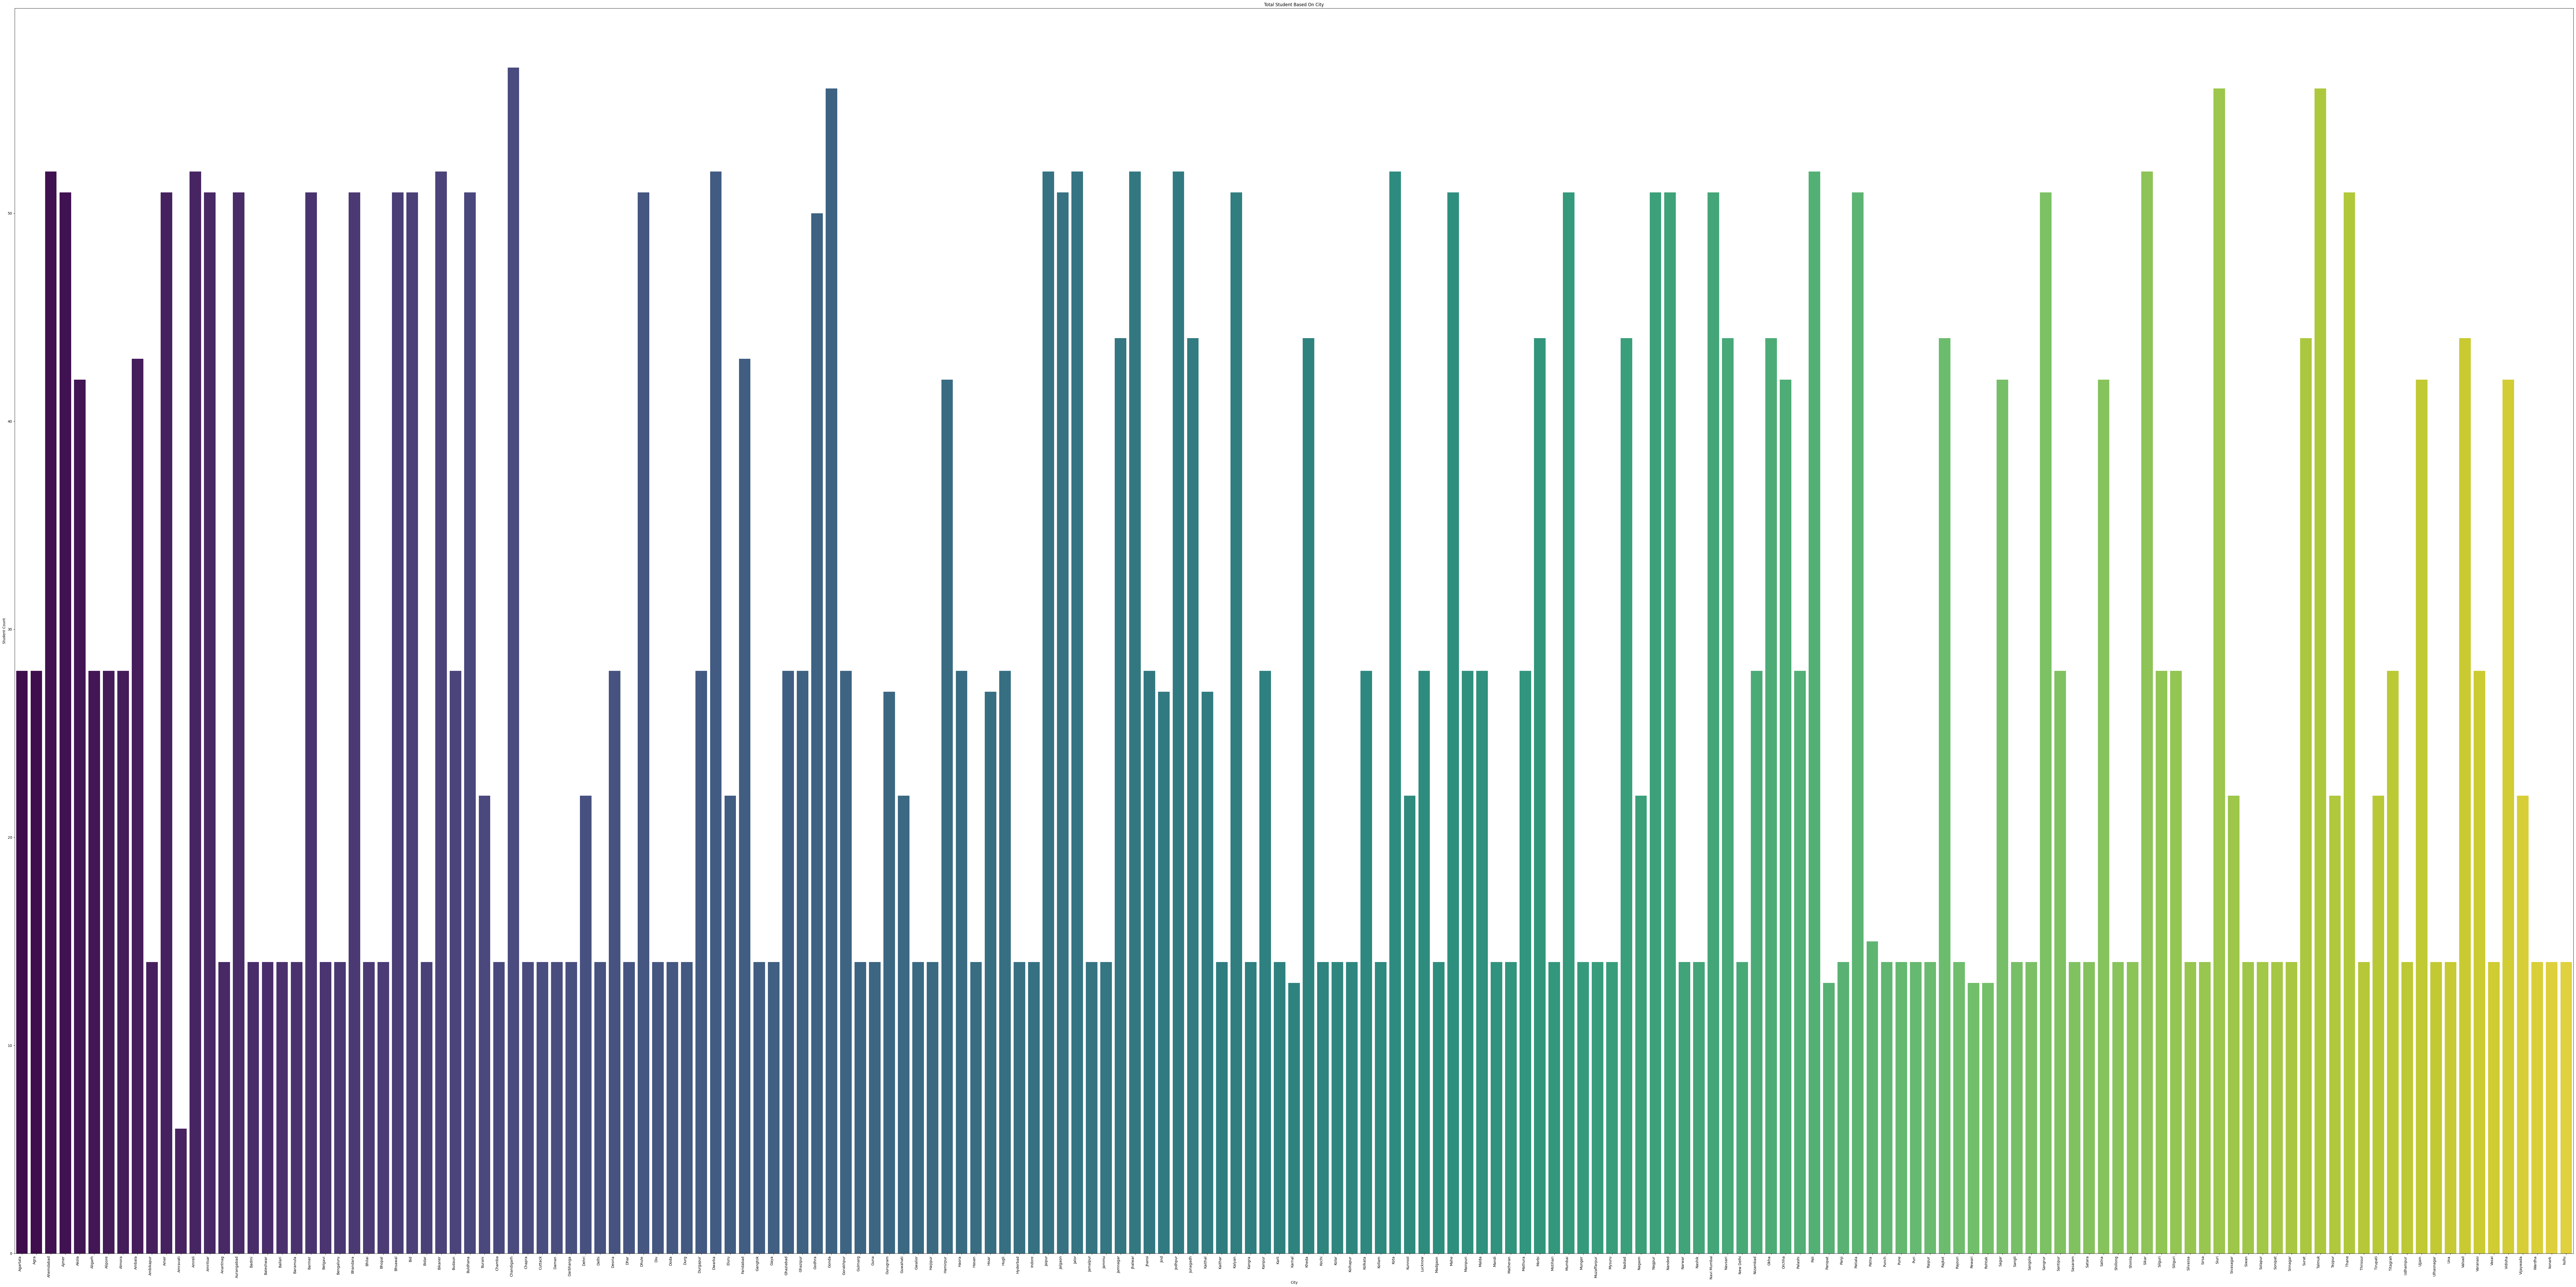

In [12]:
plt.figure(figsize=(100,50))
sns.barplot(x = 'City', y='Student Count', data=result, palette= 'viridis')
plt.title('Total Student Based On City')
plt.xlabel('City')
plt.ylabel('Student Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

# Which event tend to attract more students from specific fields of study? #

In [62]:
fields_of_study = ['Engineering', 'Data Science and Analyst', 'Asst. Professor']
filtered_data = dataSet[dataSet['Designation'].isin(fields_of_study)]
grouped_data = filtered_data.groupby(['Events', 'Designation']).size().reset_index(name='Student Count')
grouped_data

,Events,Designation,Student Count
0,IAC - Q&A,Asst. Professor,23
1,Internship Program(IP) Success Conclave,Asst. Professor,6
2,Internship Program(IP) Success Conclave,Data Science and Analyst,32
3,KYC - Know Your CCPC,Asst. Professor,4
4,KYC - Know Your CCPC,Data Science and Analyst,2


# Do students in leadership positions during their college years tend to have higher GPAs or better expected salary? #

In [61]:
dataSet['Leadership- skills'].value_counts()
dataSet['Leadership- skills'].replace('no ', 'no', inplace=True)
dataSet['Leadership- skills'].value_counts()
avg_salary = dataSet['Expected salary (Lac)'].mean() 
avg_cgpa = dataSet['CGPA'].mean() 
print('The average CGPA of the interns is: ',avg_cgpa)
print(f'The average Expected Salary of the interns is: {avg_salary} Lakhs')
temp_Yes = dataSet[dataSet['Leadership- skills'].isin(['yes'])].reset_index(drop=True)
temp_No = dataSet[dataSet['Leadership- skills'].isin(['no'])].reset_index(drop=True)
temp1 = dataSet[(dataSet['CGPA'] >= avg_cgpa)]
temp2 = dataSet[(dataSet['Expected salary (Lac)'] >= avg_salary)]
print('Total Students : ',dataSet.shape[0])
print('Total Students having high cgpa: ',temp1.shape[0])
print('Total Students having high expected salary: ',temp2.shape[0])
print('Total Students have high cgpa: ',dataSet.shape[0])
print('Total Students That have leadership skill: ',temp_Yes.shape[0])
print('Total Students dont have leadership skill: ',temp_No.shape[0])
temp_yes_high_cgpa = temp_Yes[(temp_Yes['CGPA'] >= avg_cgpa)].reset_index(drop=True)
print('The students that have leadership skill and high cgpa: ',temp_yes_high_cgpa.shape[0])
temp_yes_high_salary_cgpa = temp_Yes[(temp_Yes['Expected salary (Lac)'] >= avg_salary)]
print('The students have leadership skill and high expecteds salary: ',temp_yes_high_salary_cgpa.shape[0])

The average CGPA of the interns is:  8.038475684511647
The average Expected Salary of the interns is: 13.935635472006538 Lakhs
Total Students :  4894
Total Students having high cgpa:  2256
Total Students having high expected salary:  2259
Total Students have high cgpa:  4894
Total Students That have leadership skill:  1631
Total Students dont have leadership skill:  3263
The students that have leadership skill and high cgpa:  749
The students have leadership skill and high expecteds salary:  754


# How many students are graduating by the end of 2024? #

In [20]:
grad_year = 2024
temp = dataSet[dataSet['Year of Graduation'] <= grad_year].reset_index()
temp.to_csv('Data/Moderate Questions/Graduation Year.csv', index=False)
print(f'There are total {temp.shape[0]} students that are graduating by the end of {grad_year}')

There are total 3047 students that are graduating by the end of 2024


# Which promotion channel brings in more student participations for the event? #

In [16]:
channel_participation = dataSet.groupby('How did you come to know about this event?')['Email ID'].nunique()
output = channel_participation.reset_index()
output.to_csv('Data/Moderate Questions/Channel Participation.csv',index=False)
output

,How did you come to know about this event?,Email ID
0,Cloud Counselage Website,114
1,Cloud Counselage Website | Friend/ Classmate,2
2,Cloud Counselage Website | Friend/ Classmate |...,1
3,Cloud Counselage Website | Others,6
4,Cloud Counselage Website | SPOC/ College Profe...,6
...,...,...
94,Youtube | Whatsapp,14
95,Youtube | Whatsapp | Cloud Counselage Website,1
96,Youtube | Whatsapp | Email,11
97,Youtube | Whatsapp | Email | Cloud Counselage ...,1


# Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.) #

In [19]:
arr = dataSet['Events'].unique()
print(arr)
topic = ['Data Visualization using Power BI' ,'IS DATA SCIENCE FOR YOU?', 'Hello ML and DL', 'Artificial Intelligence']
filtered_temp = dataSet[dataSet['Events'].isin(topic)]
filtered_temp.to_csv('Data/Moderate Questions/Data Science Related Events.csv', index=False)
print(f"There are total {filtered_temp.shape[0]} students who attended Data Science related Events")

['Art of Resume Building' 'Data Visualization using Power BI'
 'Artificial Intelligence' 'Hello ML and DL' 'Product Marketing'
 'IAC - Q&A' 'Internship Program(IP) Success Conclave'
 'IS DATA SCIENCE FOR YOU?' 'KYC - Know Your CCPC'
 'Product Design & Full Stack' 'RPA: A Boon or A Bane'
 'Skill and Employability Enhancement'
 'Talk on Skill and Employability Enhancement' 'The Agile Ways of Working'
 'The SDLC & their transformations'
 'Transformation with DevOps: The Easy Way']
There are total 1148 students who attended Data Science related Events


# Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg) #

In [26]:
column_num = [2,3,4,5,6,7,8,9,10,13,15]
num = dataSet.shape[0]
print('Total Students: ',num)
temp = dataSet.drop(dataSet.columns[column_num], axis=1)
avg_cgpa = temp['CGPA'].mean()
avg_python = temp['Experience with python (Months)'].mean()
avg_salary = temp['Expected salary (Lac)'].mean()
temp1 = temp[(temp['CGPA'] >= avg_cgpa) & (temp['Experience with python (Months)'] >= avg_python)].reset_index()
print("Students have high cgpa and python experiance: ",temp1.shape[0])
temp2 = temp[(temp['CGPA'] >= avg_cgpa) & (temp['Experience with python (Months)'] >= avg_python) & (temp['Expected salary (Lac)'] >= avg_salary)].reset_index()
print('Total Students having high salary and high cgpa and high experience: ',temp2.shape[0])


Total Students:  4894
Students have high cgpa and python experiance:  1004
Total Students having high salary and high cgpa and high experience:  690


# How many students know about the event from their colleges? Which of these Top colleges? #

In [49]:
a = dataSet.dropna(axis=0).reset_index(drop=True)
filtered_temp_new = a[dataSet['Specify in "Others" (how did you come to know about this event)'].isin(['College'])]
filtered_temp_new.reset_index(drop=True)
column_num_new = [2,3,4,6,8,13]
filtered_temp_new = filtered_temp_new.drop(filtered_temp_new.columns[column_num_new],axis=1)
filtered_temp_new.to_csv('Data/Moderate Questions/Events Heard From College.csv',index=False)
print(f'Total students who know about the event by there colleges are: ',filtered_temp_new.shape[0])
filtered_temp_new.reset_index(drop=True).head(5) 

Total students who know about the event by there colleges are:  15


C:\Users\santa\AppData\Local\Temp\ipykernel_34528\4287963816.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_temp_new = a[dataSet['Specify in "Others" (how did you come to know about this event)'].isin(['College'])]


,First Name,Email ID,College Name,"Specify in ""Others"" (how did you come to know about this event)",Year of Graduation,City,CGPA,Experience with python (Months),Expected salary (Lac),Leadership- skills
0,Mayuresh,mayuresh@xyz.com,GOVERNMENT POLYTECHNIC GANDHINAGAR,College,2024,Tezpur,8.6,4,7,no
1,Shweta,shweta@xyz.com,"S.I.E.S. Graduate School Of Technology, Nerul,...",College,2024,Srinagar,8.5,7,10,no
2,Priyanka,priyanka@xyz.com,"Vishwakarma Institute of Technology, Pune",College,2023,Hugli,9.3,5,8,no
3,Vishal,vishal@xyz.com,"MIT Academy Of Engineering ,Alandi",College,2023,Dhule,8.2,3,7,yes
4,Shivani,shivani@xyz.com,st xavier's college,Friends,2024,Dwarka,7.9,3,17,no
